In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn

from pandas import Series,DataFrame
from pylab import rcParams
from sklearn import preprocessing

In [2]:
%matplotlib inline
rcParams['figure.figsize'] = 8,4
sb.set_style('whitegrid') 

In [3]:
address = 'C:/Users/Shreya Mariam/Desktop/Assignments/Customer.csv'
data = pd.read_csv(address)
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
state                     3333 non-null object
account length            3333 non-null int64
area code                 3333 non-null int64
phone number              3333 non-null object
international plan        3333 non-null object
voice mail plan           3333 non-null object
number vmail messages     3333 non-null int64
total day minutes         3333 non-null float64
total day calls           3333 non-null int64
total day charge          3333 non-null float64
total eve minutes         3333 non-null float64
total eve calls           3333 non-null int64
total eve charge          3333 non-null float64
total night minutes       3333 non-null float64
total night calls         3333 non-null int64
total night charge        3333 non-null float64
total intl minutes        3333 non-null float64
total intl calls          3333 non-null int64
total intl charge         3333 non-null float64

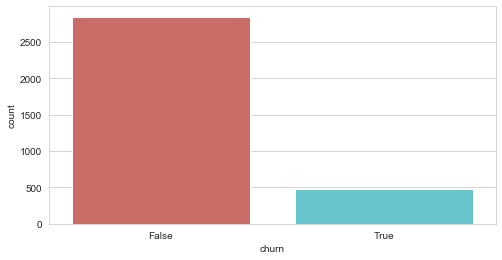

In [5]:
sb.countplot(x = 'churn',data = data,palette = 'hls')

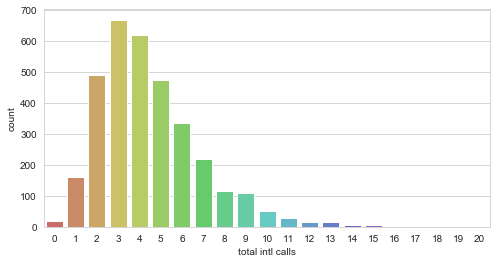

In [6]:
sb.countplot(x = 'total intl calls',data = data,palette = 'hls')

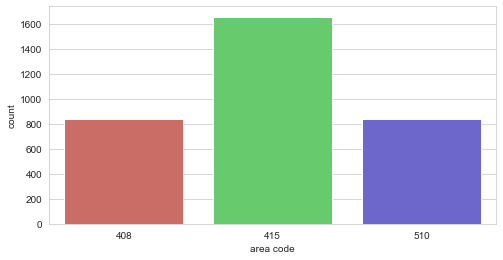

In [7]:
sb.countplot(x = 'area code',data = data,palette = 'hls')

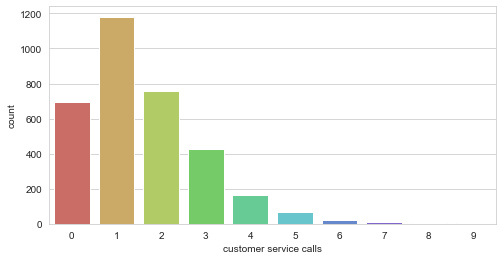

In [8]:
sb.countplot(x = 'customer service calls',data = data,palette = 'hls')

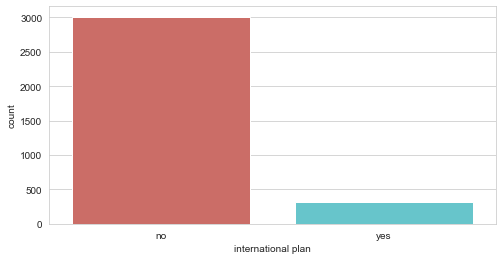

In [9]:
sb.countplot(x = 'international plan',data = data,palette = 'hls')

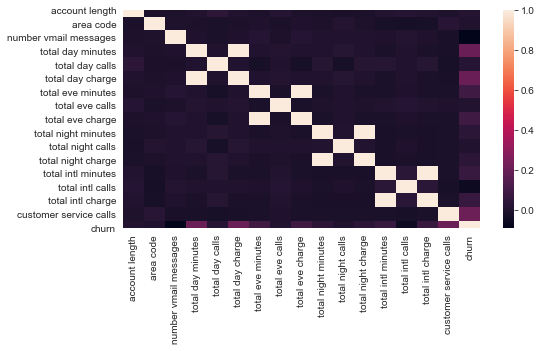

In [10]:
sb.heatmap(data.corr())

In [11]:
data.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [12]:
data.drop(['state','account length','number vmail messages'],axis=1,inplace=True)
data.head()

,area code,phone number,international plan,voice mail plan,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,415,382-4657,no,yes,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,415,371-7191,no,yes,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,415,358-1921,no,no,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,408,375-9999,yes,no,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,415,330-6626,yes,no,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [13]:
data.drop(['total night calls','total day calls','total night minutes','total day minutes'],axis=1,inplace=True)
data.head()

,area code,phone number,international plan,voice mail plan,total day charge,total eve minutes,total eve calls,total eve charge,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,415,382-4657,no,yes,45.07,197.4,99,16.78,11.01,10.0,3,2.70,1,False
1,415,371-7191,no,yes,27.47,195.5,103,16.62,11.45,13.7,3,3.70,1,False
2,415,358-1921,no,no,41.38,121.2,110,10.30,7.32,12.2,5,3.29,0,False
3,408,375-9999,yes,no,50.90,61.9,88,5.26,8.86,6.6,7,1.78,2,False
4,415,330-6626,yes,no,28.34,148.3,122,12.61,8.41,10.1,3,2.73,3,False


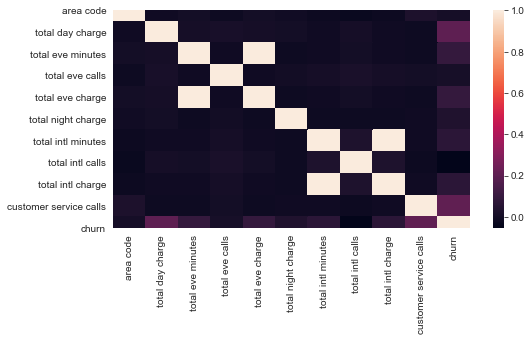

In [14]:
sb.heatmap(data.corr())

In [15]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
ip = data['international plan']
ip_val = label_encoder.fit_transform(ip)
ip_val

array([0, 0, 0, ..., 0, 1, 0])

In [16]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder(categories = 'auto')
new_ip = encoder.fit_transform(ip_val.reshape(-1,1))
newip_mat = new_ip.toarray()
newip_df = pd.DataFrame(newip_mat , columns =['IP:no','IP:yes'])
newip_df.head()

,IP:no,IP:yes
0,1.0,0.0
1,1.0,0.0
2,1.0,0.0
3,0.0,1.0
4,0.0,1.0


In [17]:
data.drop('international plan',axis = 1,inplace = True)
data.head()

,area code,phone number,voice mail plan,total day charge,total eve minutes,total eve calls,total eve charge,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,415,382-4657,yes,45.07,197.4,99,16.78,11.01,10.0,3,2.70,1,False
1,415,371-7191,yes,27.47,195.5,103,16.62,11.45,13.7,3,3.70,1,False
2,415,358-1921,no,41.38,121.2,110,10.30,7.32,12.2,5,3.29,0,False
3,408,375-9999,no,50.90,61.9,88,5.26,8.86,6.6,7,1.78,2,False
4,415,330-6626,no,28.34,148.3,122,12.61,8.41,10.1,3,2.73,3,False


In [18]:
data_dummy = pd.concat([data,newip_df],axis=1,verify_integrity = True)#.astype(float)
data_dummy.head()

,area code,phone number,voice mail plan,total day charge,total eve minutes,total eve calls,total eve charge,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn,IP:no,IP:yes
0,415,382-4657,yes,45.07,197.4,99,16.78,11.01,10.0,3,2.70,1,False,1.0,0.0
1,415,371-7191,yes,27.47,195.5,103,16.62,11.45,13.7,3,3.70,1,False,1.0,0.0
2,415,358-1921,no,41.38,121.2,110,10.30,7.32,12.2,5,3.29,0,False,1.0,0.0
3,408,375-9999,no,50.90,61.9,88,5.26,8.86,6.6,7,1.78,2,False,0.0,1.0
4,415,330-6626,no,28.34,148.3,122,12.61,8.41,10.1,3,2.73,3,False,0.0,1.0


In [19]:
data_dummy.drop(['total eve calls','total night charge','total intl calls'],axis = 1,inplace = True)
data_dummy.head()

,area code,phone number,voice mail plan,total day charge,total eve minutes,total eve charge,total intl minutes,total intl charge,customer service calls,churn,IP:no,IP:yes
0,415,382-4657,yes,45.07,197.4,16.78,10.0,2.70,1,False,1.0,0.0
1,415,371-7191,yes,27.47,195.5,16.62,13.7,3.70,1,False,1.0,0.0
2,415,358-1921,no,41.38,121.2,10.30,12.2,3.29,0,False,1.0,0.0
3,408,375-9999,no,50.90,61.9,5.26,6.6,1.78,2,False,0.0,1.0
4,415,330-6626,no,28.34,148.3,12.61,10.1,2.73,3,False,0.0,1.0


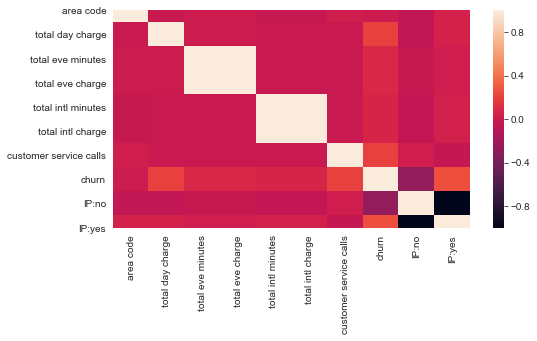

In [20]:
sb.heatmap(data_dummy.corr())

In [21]:
from sklearn.preprocessing import LabelEncoder
label_encode = LabelEncoder()
churn = data_dummy['churn']
churn_val = label_encode.fit_transform(churn)
churn_val

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [22]:
churn_df = pd.DataFrame(churn_val,columns = ['churn'])
churn_df

,churn
0,0
1,0
2,0
3,0
4,0
...,...
3328,0
3329,0
3330,0
3331,0


In [23]:
data_dummy.drop(['churn','voice mail plan','area code','phone number','total eve minutes','total eve charge'],axis = 1,inplace=True)
data_dummy

,total day charge,total intl minutes,total intl charge,customer service calls,IP:no,IP:yes
0,45.07,10.0,2.70,1,1.0,0.0
1,27.47,13.7,3.70,1,1.0,0.0
2,41.38,12.2,3.29,0,1.0,0.0
3,50.90,6.6,1.78,2,0.0,1.0
4,28.34,10.1,2.73,3,0.0,1.0
...,...,...,...,...,...,...
3328,26.55,9.9,2.67,2,1.0,0.0
3329,39.29,9.6,2.59,3,1.0,0.0
3330,30.74,14.1,3.81,2,1.0,0.0
3331,36.35,5.0,1.35,2,0.0,1.0


In [24]:
newdata = pd.concat([data_dummy,churn_df],axis = 1,verify_integrity = True)
newdata

,total day charge,total intl minutes,total intl charge,customer service calls,IP:no,IP:yes,churn
0,45.07,10.0,2.70,1,1.0,0.0,0
1,27.47,13.7,3.70,1,1.0,0.0,0
2,41.38,12.2,3.29,0,1.0,0.0,0
3,50.90,6.6,1.78,2,0.0,1.0,0
4,28.34,10.1,2.73,3,0.0,1.0,0
...,...,...,...,...,...,...,...
3328,26.55,9.9,2.67,2,1.0,0.0,0
3329,39.29,9.6,2.59,3,1.0,0.0,0
3330,30.74,14.1,3.81,2,1.0,0.0,0
3331,36.35,5.0,1.35,2,0.0,1.0,0


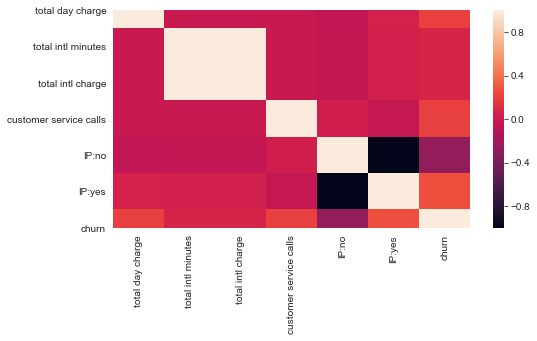

In [25]:
sb.heatmap(newdata.corr())

In [26]:
newdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 7 columns):
total day charge          3333 non-null float64
total intl minutes        3333 non-null float64
total intl charge         3333 non-null float64
customer service calls    3333 non-null int64
IP:no                     3333 non-null float64
IP:yes                    3333 non-null float64
churn                     3333 non-null int64
dtypes: float64(5), int64(2)
memory usage: 182.4 KB


In [27]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_predict

from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score

In [28]:
X_train,X_test,y_train,y_test = train_test_split(newdata.drop('churn',axis = 1),
                                                newdata['churn'],test_size = 0.2,
                                                random_state=0)
print(X_train.shape)
print(y_train.shape)

(2666, 6)
(2666,)


In [29]:
X_train

,total day charge,total intl minutes,total intl charge,customer service calls,IP:no,IP:yes
1460,33.68,9.3,2.51,3,1.0,0.0
2000,28.59,10.1,2.73,3,1.0,0.0
666,42.84,9.6,2.59,2,1.0,0.0
2962,42.77,5.4,1.46,1,1.0,0.0
2773,42.02,6.1,1.65,2,1.0,0.0
...,...,...,...,...,...,...
835,12.36,9.9,2.67,1,1.0,0.0
3264,16.63,5.9,1.59,0,1.0,0.0
1653,22.34,11.1,3.00,1,0.0,1.0
2607,32.18,9.9,2.67,3,1.0,0.0


In [30]:
LogReg = LogisticRegression(solver='liblinear')
LogReg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
ypred = LogReg.predict(X_test)

In [32]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.89      0.97      0.93       579
           1       0.47      0.19      0.27        88

    accuracy                           0.87       667
   macro avg       0.68      0.58      0.60       667
weighted avg       0.83      0.87      0.84       667



In [33]:
ytrain_pred = cross_val_predict(LogReg,X_train,y_train,cv =5)
confusion_matrix(y_train,ytrain_pred)

array([[2212,   59],
       [ 333,   62]], dtype=int64)

In [34]:
precision_score(y_train,ytrain_pred)

0.512396694214876

In [35]:
newdata[879:880]

,total day charge,total intl minutes,total intl charge,customer service calls,IP:no,IP:yes,churn
879,46.04,11.8,3.19,4,1.0,0.0,0


In [36]:
test_customer = np.array([[47,12,3,5,1,0]])

print(LogReg.predict(test_customer))

print(LogReg.predict_proba(test_customer))

[1]
[[0.34329933 0.65670067]]


In [37]:
newdata[291:292]

,total day charge,total intl minutes,total intl charge,customer service calls,IP:no,IP:yes,churn
291,16.92,9.7,2.62,0,1.0,0.0,0


In [38]:
test_customer = np.array([[16,10,2,0,1,0]])

print(LogReg.predict(test_customer))

print(LogReg.predict_proba(test_customer))

[0]
[[0.98461883 0.01538117]]


In [39]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
classifier = RandomForestClassifier(n_estimators = 200,random_state = 0)

y_train_array = np.ravel(y_train)

model = classifier.fit(X_train,y_train_array)


ypred = classifier.predict(X_test)

In [41]:
print(classification_report(y_test,ypred))

              precision    recall  f1-score   support

           0       0.94      0.94      0.94       579
           1       0.60      0.59      0.60        88

    accuracy                           0.90       667
   macro avg       0.77      0.77      0.77       667
weighted avg       0.89      0.90      0.89       667



In [42]:
y_test_array = np.ravel(y_test)

In [43]:
y_test_array

array([0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,

In [44]:
ypred

array([1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,

In [45]:
from sklearn.datasets import make_classification
from sklearn.metrics import roc_curve,roc_auc_score

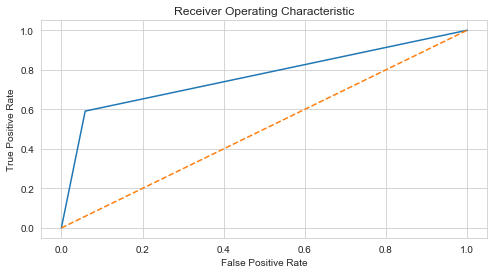

In [46]:
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, ypred)

plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1],ls="--")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


[0.04180395 0.14320586 0.05218    0.13469483 0.06904115 0.04634798
 0.06679197 0.05373218 0.05555736 0.05407735 0.05041926 0.05497012
 0.05036769 0.12681031]


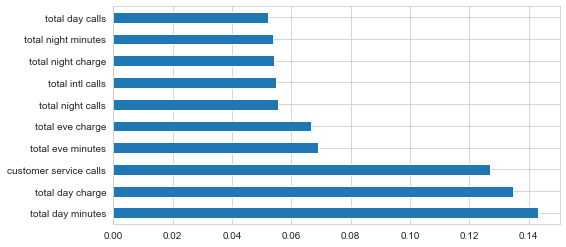

In [47]:
import pandas as pd
import numpy as np
data = pd.read_csv('C:/Users/Shreya Mariam/Desktop/Assignments/Customer.csv')
X = data.iloc[:,6:20]  
y = data.iloc[:,-1]    
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) 
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

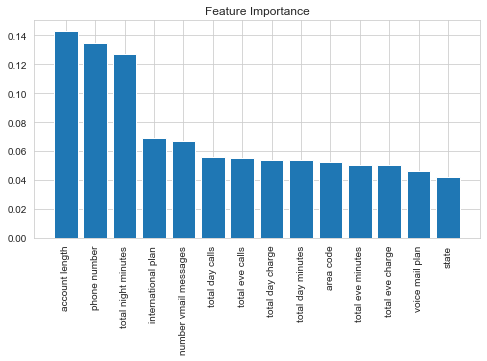

In [48]:
from sklearn.ensemble import ExtraTreesClassifier

importances = model.feature_importances_
indices = np.argsort(importances)[::-1]
names = [data.columns[i] for i in indices]
plt.figure()
plt.title("Feature Importance")
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), names, rotation=90)
plt.show()
